In [4]:
#COME 403 Project Report by Mert Topkaya(202003001011) and Azizcan Yalçın(202003001014)
#used from website :"https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_bcancer=pd.read_csv("wdbc.data", header=None)
df_bcancer.columns =['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concavepoints1', 'symmetry1', 'fractal_dimension1',
                  'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3',
                  'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3','fractal_dimension3']
#ID : Unique identifier for each patient.
#Diagnosis : The diagnosis of breast cancer 1 means malignant and 0 means bening.
#Radius(1,2,3) : mean of distances from center to points on the perimeter.
#Texture(1, 2, 3) : Standart deviation of gray-scale values.
#Perimeter(1, 2, 3) : For breast mass.
#Area(1, 2, 3) : For breast mass.
#Smoothness(1, 2, 3) : Local variation in radius lenghts.
#Compactness(1, 2, 3) : (perimeter^2/area-1.0)
#Concavity(1, 2, 3,) :  Severity of concave portions of the contour.
#Concave Points(1, 2, 3) : Number of concave portions of the contour.
#Symmetry(1, 2, 3) : For breast mass.
#Fractal Dimension(1, 2, 3) : (“Coastline approximation”-1)

In [ ]:
df_bcancer.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concavepoints1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn import preprocessing
#created here labelencoder as "le"
le = preprocessing.LabelEncoder()
#convert them to numbers
df_bcancer["Diagnosis"]=le.fit_transform(df_bcancer.iloc[:, 1].values)
#Malignant(M) means 1, bening(B) means 0.
print(df_bcancer.head())

         ID  Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302          1    17.99     10.38      122.80  1001.0      0.11840   
1    842517          1    20.57     17.77      132.90  1326.0      0.08474   
2  84300903          1    19.69     21.25      130.00  1203.0      0.10960   
3  84348301          1    11.42     20.38       77.58   386.1      0.14250   
4  84358402          1    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concavepoints1  ...  radius3  texture3  \
0       0.27760      0.3001         0.14710  ...    25.38     17.33   
1       0.07864      0.0869         0.07017  ...    24.99     23.41   
2       0.15990      0.1974         0.12790  ...    23.57     25.53   
3       0.28390      0.2414         0.10520  ...    14.91     26.50   
4       0.13280      0.1980         0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

In [ ]:
print(df_bcancer.shape)#rows and columns
print(df_bcancer.shape[0])#rows
print(df_bcancer.shape[1])#columns


(569, 32)
569
32


In [ ]:
from sklearn.model_selection import train_test_split
X,y = df_bcancer.iloc[:,2:], df_bcancer.iloc[:,1]
#here X is assigned to the all columns except the first one!.meanwhile y just assigned to the "first column" for prediction
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#here %30 of the data will be used for test and %70 of the data will be used for training set.Random splitting data will be remain same and stratify ensures training and test have the same
#proportion of class label as the orig dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.transform(X_test)
#its already calculated in transform data so...to make sure model calculates the data from training.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#for K=3
classifier_k3  = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier_k3.fit(X_train_std, y_train)
y_pred_k3=classifier_k3.predict(X_test_std)


In [ ]:
from sklearn.metrics import confusion_matrix
cm_k3 = confusion_matrix(y_test, y_pred_k3)

In [ ]:
cm_k3

array([[100,   7],
       [  4,  60]])

In [ ]:
#TP=100, FN=7, FP=4 and TN=60 as we can see.This was for K3
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_k3)
accuracy_k3=accuracy_score(y_test, y_pred_k3)
print(accuracy_k3)

0.935672514619883


In [ ]:
#Now for K7
classifier_k7 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
classifier_k7.fit(X_train_std, y_train)
y_pred_k7=classifier_k7.predict(X_test_std)
cm_k7 = confusion_matrix(y_test, y_pred_k7)
cm_k7

array([[101,   6],
       [  5,  59]])

In [ ]:
accuracy_score(y_test, y_pred_k7)
accuracy_k7=accuracy_score(y_test, y_pred_k7)
print(accuracy_k7)

0.935672514619883


In [ ]:
#Now for K11
classifier_k11 = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifier_k11.fit(X_train_std, y_train)
y_pred_k11=classifier_k11.predict(X_test_std)
cm_k11 = confusion_matrix(y_test, y_pred_k11)
cm_k11

array([[104,   3],
       [  4,  60]])

In [ ]:
accuracy_score(y_test, y_pred_k11)
accuracy_k11=accuracy_score(y_test, y_pred_k11)
print(accuracy_k11)

0.9590643274853801


In [ ]:
#So far our accuracy scores are for K3 and K7 = 0.935672514619883 and for K11=0.9590643274853801.Now for the p(precision), f(f1-score), r(recall) for each KNN
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_k3))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.90      0.94      0.92        64

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
print(classification_report(y_test, y_pred_k7))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.91      0.92      0.91        64

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
print(classification_report(y_test, y_pred_k11))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.95      0.94      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
#NOW ITS FOR MLP
import itertools
import os
import seaborn as sea

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sea.set_style("darkgrid")

df_bcancer.head(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concavepoints1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
dataCancer_X = df_bcancer.loc[:, df_bcancer.columns != "Diagnosis"]
dataCancer_Y = df_bcancer[["Diagnosis"]]

print("data_X info:\n")
dataCancer_X.info()
print("\ndata_Y info:\n")
dataCancer_Y.info()

data_X info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concavepoints1      569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64

In [ ]:
#As we can see our range index is from 0 to 568.Also as we can see none of the contents has "null" var in it.Data loaded correctly.
dataCancer_Y["Diagnosis"].value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(dataCancer_X, dataCancer_Y, test_size=0.2, stratify=dataCancer_Y, random_state=0)
#reminder that x is independent and y is dependent variable.This time we will use test data for %20 part of it.%80 will be for training.We ensure stratify also uses dataCancer_Y var for overall distribution.As usual
#random state =0 makes sure we get exact same data split.

train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

In [ ]:
from sklearn.preprocessing import StandardScaler
feature_names = train_X.columns

scaler = StandardScaler()
#here our "scaler" var fitted for train X whose is learning its properties.
scaler.fit(train_X)

train_X = scaler.transform(train_X)
train_X = pd.DataFrame(train_X, columns = feature_names)
#The data we standartized converted back into its dataframe

test_X = scaler.transform(test_X)
test_X = pd.DataFrame(test_X, columns = feature_names)

In [ ]:
#This is for one hidden layer with 32 neurons
clf_for_1 = MLPClassifier(solver="adam", max_iter=5000, activation = "relu",
                          hidden_layer_sizes = (32, ),
                          alpha = 0.01,
                          batch_size = 64,
                          learning_rate_init = 0.001,
                          random_state=2)
clf_for_1.fit(train_X, train_Y.values.ravel());
#Note:"adam" is optimization algorithm.Uses(combines) momentum and root mean square propagation

In [ ]:
print(classification_report(test_Y, clf_for_1.predict(test_X),
                            digits = 4,
                            target_names = ["Bening", "Malignant"]))

              precision    recall  f1-score   support

      Bening     0.9589    0.9722    0.9655        72
   Malignant     0.9512    0.9286    0.9398        42

    accuracy                         0.9561       114
   macro avg     0.9551    0.9504    0.9526       114
weighted avg     0.9561    0.9561    0.9560       114



In [ ]:
#This is for two hidden layer with 32 neurons
clf_for_2 = MLPClassifier(solver="adam", max_iter=5000, activation="relu",
                          hidden_layer_sizes = (32, 32),
                          alpha = 0.01,
                          batch_size = 64,
                          learning_rate_init = 0.001,
                          random_state = 2)
clf_for_2.fit(train_X, train_Y.values.ravel());

In [ ]:
print(classification_report(test_Y, clf_for_2.predict(test_X),
                            digits = 4,
                            target_names = ["Bening", "Malignant"]))

              precision    recall  f1-score   support

      Bening     0.9459    0.9722    0.9589        72
   Malignant     0.9500    0.9048    0.9268        42

    accuracy                         0.9474       114
   macro avg     0.9480    0.9385    0.9429       114
weighted avg     0.9474    0.9474    0.9471       114



In [ ]:
#This is for three hidden layer with 32 neurons
clf_for_3 = MLPClassifier(solver="adam", max_iter=5000, activation="relu",
                          hidden_layer_sizes = (32, 32, 32),
                          alpha = 0.01,
                          batch_size = 64,
                          learning_rate_init=0.001,
                          random_state = 2)
clf_for_3.fit(train_X, train_Y.values.ravel());

In [ ]:
print(classification_report(test_Y, clf_for_3.predict(test_X),
                            digits= 4,
                            target_names = ["Bening", "Malignant"]))

              precision    recall  f1-score   support

      Bening     0.9722    0.9722    0.9722        72
   Malignant     0.9524    0.9524    0.9524        42

    accuracy                         0.9649       114
   macro avg     0.9623    0.9623    0.9623       114
weighted avg     0.9649    0.9649    0.9649       114



In [ ]:
#NAIVE BAYES ALGORITHM WITH DEFAULT PARAMETERS
print(df_bcancer)

           ID  Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0      842302          1    17.99     10.38      122.80  1001.0      0.11840   
1      842517          1    20.57     17.77      132.90  1326.0      0.08474   
2    84300903          1    19.69     21.25      130.00  1203.0      0.10960   
3    84348301          1    11.42     20.38       77.58   386.1      0.14250   
4    84358402          1    20.29     14.34      135.10  1297.0      0.10030   
..        ...        ...      ...       ...         ...     ...          ...   
564    926424          1    21.56     22.39      142.00  1479.0      0.11100   
565    926682          1    20.13     28.25      131.20  1261.0      0.09780   
566    926954          1    16.60     28.08      108.30   858.1      0.08455   
567    927241          1    20.60     29.33      140.10  1265.0      0.11780   
568     92751          0     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concavep

In [ ]:
X = df_bcancer.iloc[:, 2:].values
y = df_bcancer.iloc[:, 1].values

In [ ]:
#here we split the data test size as %25 of it and %75 of it will go to traininw set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [ ]:
#Scaling part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#here we use naive bayes
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))
print("Any NaN in X_train:", np.isnan(X_train).any())
print("Any NaN in y_train:", np.isnan(y_train).any())


X_train shape: (426, 30)
y_train shape: (426,)
X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>
Any NaN in X_train: False
Any NaN in y_train: False


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#Confusion matrix for Naive Bates
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred)
print(cm_NB)

[[84  6]
 [ 6 47]]


In [ ]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        90
           1       0.89      0.89      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [ ]:
#Now time for comparing each result:
import pandas as pd
models_performance = {
    'Model' : ['KNN3', 'KNN7', 'KNN11', 'NeuralHidden1', 'NeuralHidden2', 'NeuralHidden3', 'NaiveBayes'],
    'Accuracy' : [0.94, 0.94, 0.96, 0.9561, 0.9474, 0.9679, 0.92],
    'Precision' : [(0.96+0.90)/2, (0.95+0.91)/2, (0.96+0.95)/2, (0.9589+0.9512)/2, (0.9459+0.9500)/2, (0.9722+0.9524)/2, (0.93+0.89)/2],
    'Recall' : [(0.93+0.94)/2, (0.94+0.92)/2, (0.97+0.94)/2, (0.9722+0.9286)/2, (0.9722+0.9048)/2, (0.9722+0.9524)/2, (0.93+0.89)/2],
    'F1-Score' : [(0.95+0.92)/2, (0.95+0.91)/2, (0.97+0.94)/2, (0.9655+0.9398)/2, (0.9589+0.9268)/2, (0.9722+0.9524)/2, (0.93+0.89)/2]
}
performance_df_bcancer = pd.DataFrame(models_performance)
print(performance_df_bcancer)

           Model  Accuracy  Precision  Recall  F1-Score
0           KNN3    0.9400    0.93000  0.9350   0.93500
1           KNN7    0.9400    0.93000  0.9300   0.93000
2          KNN11    0.9600    0.95500  0.9550   0.95500
3  NeuralHidden1    0.9561    0.95505  0.9504   0.95265
4  NeuralHidden2    0.9474    0.94795  0.9385   0.94285
5  NeuralHidden3    0.9679    0.96230  0.9623   0.96230
6     NaiveBayes    0.9200    0.91000  0.9100   0.91000


In [ ]:
#Now time to compare!Note we use metrics to rank the models here
def ranking_of_models(performance_df_bcancer, metrics):
  ranked_dfBCancer = performance_df_bcancer[['Model', metrics]].sort_values(by=metrics, ascending=False).reset_index(drop=True)
  ranked_dfBCancer.index += 1
  return ranked_dfBCancer
performance_df_bcancer = pd.DataFrame(models_performance)
#also for visualizing heres the code:
import seaborn as sea
import matplotlib.pyplot as plt

def visual_ranks(ranked_dfBCancer, metric):
  plt.figure(figsize=(10, 6))
  sea.barplot(x=metric, y='Model', data=ranked_dfBCancer, orient='h')
  plt.title(f'Model ranking by {metric}')
  plt.xlabel(metric)
  plt.ylabel('Model')
  plt.show()


Model ranked by accuracy:
            Model  Accuracy
1  NeuralHidden3    0.9679
2          KNN11    0.9600
3  NeuralHidden1    0.9561
4  NeuralHidden2    0.9474
5           KNN3    0.9400
6           KNN7    0.9400
7     NaiveBayes    0.9200


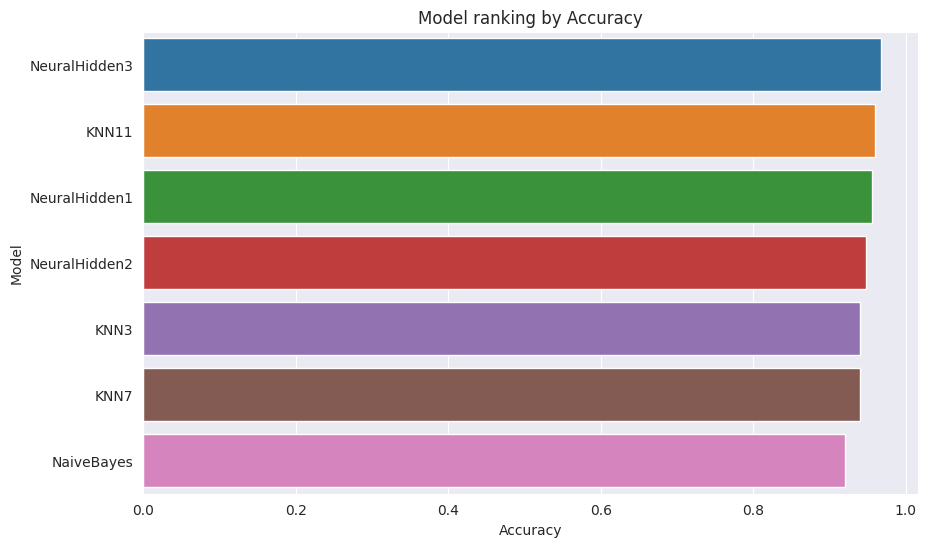

In [ ]:
#Accuracy:
accuracy_rank = ranking_of_models(performance_df_bcancer, 'Accuracy')
print("Model ranked by accuracy:\n", accuracy_rank)
visual_ranks(accuracy_rank, 'Accuracy')

Models ranked by precision:
            Model  Precision
1  NeuralHidden3    0.96230
2  NeuralHidden1    0.95505
3          KNN11    0.95500
4  NeuralHidden2    0.94795
5           KNN3    0.93000
6           KNN7    0.93000
7     NaiveBayes    0.91000


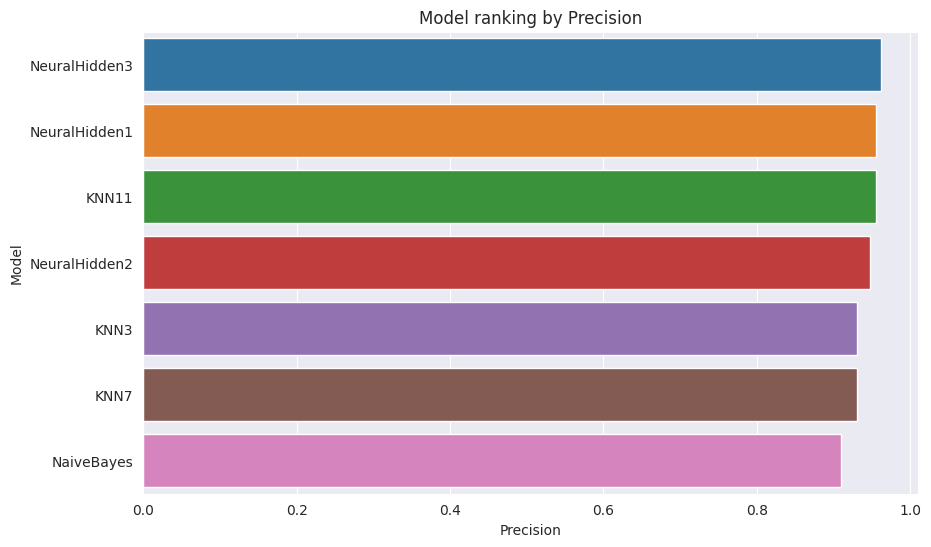

In [ ]:
#Precision:
precision_rank = ranking_of_models(performance_df_bcancer, 'Precision')
print("Models ranked by precision:\n", precision_rank)
visual_ranks(precision_rank, 'Precision')

Models ranked by recall:
            Model  Recall
1  NeuralHidden3  0.9623
2          KNN11  0.9550
3  NeuralHidden1  0.9504
4  NeuralHidden2  0.9385
5           KNN3  0.9350
6           KNN7  0.9300
7     NaiveBayes  0.9100


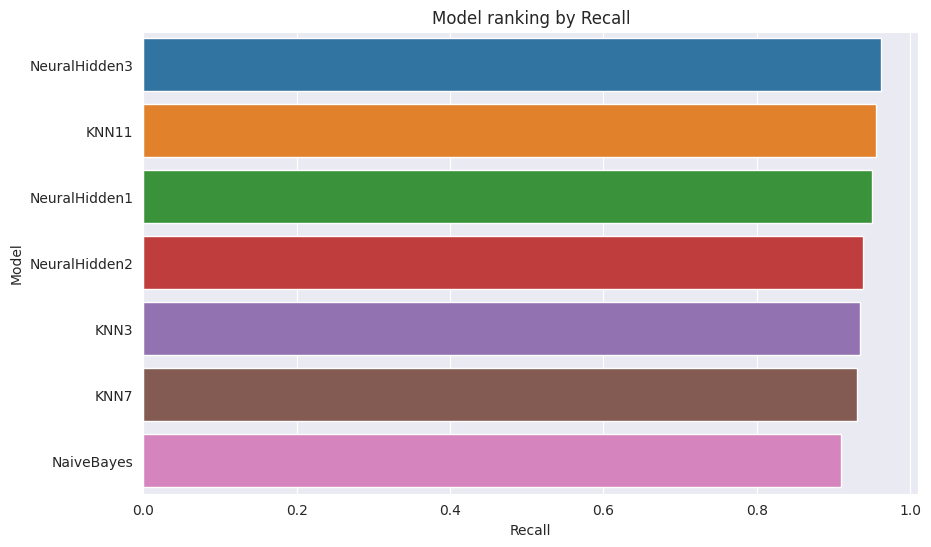

In [ ]:
#Recall:
recall_rank = ranking_of_models(performance_df_bcancer, 'Recall')
print("Models ranked by recall:\n", recall_rank)
visual_ranks(recall_rank, 'Recall')

Models ranked by F1-ScoreRank:
            Model  Recall
1  NeuralHidden3  0.9623
2          KNN11  0.9550
3  NeuralHidden1  0.9504
4  NeuralHidden2  0.9385
5           KNN3  0.9350
6           KNN7  0.9300
7     NaiveBayes  0.9100


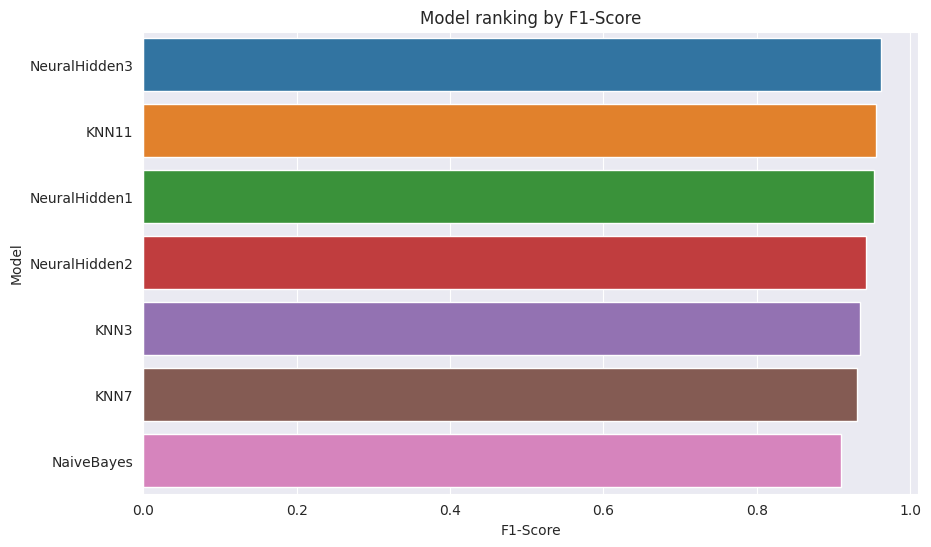

In [ ]:
#F1_score:
f1_score_rank = ranking_of_models(performance_df_bcancer, 'F1-Score')
print("Models ranked by F1-ScoreRank:\n", recall_rank)
visual_ranks(f1_score_rank, 'F1-Score')